In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [2]:
data=pd.read_csv('weatherAUS.csv')  # read the data
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Dimensions of Dataset

In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 

 

(8425, 23)
Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshi

In [4]:
#first remove duplicates & recheck the size
data.drop_duplicates(inplace=True)

print(data.shape)

(6762, 23)


# Statistical Summary

In [5]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6762,6762,6692.000000,6705.000000,6624.000000,3841.000000,3526.000000,5820,5820.000000,5968,...,6708.000000,6666.000000,5454.000000,5451.000000,4896.000000,4860.000000,6711.000000,6670.000000,6624,6624
unique,3004,12,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2011-02-24,PerthAirport,NaN,NaN,NaN,NaN,NaN,E,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,4,1204,NaN,NaN,NaN,NaN,NaN,518,NaN,609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5052,5052
mean,NaN,NaN,13.109145,24.098345,2.780148,5.302395,7.890896,NaN,38.977663,NaN,...,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561,NaN,NaN
std,NaN,NaN,5.569574,6.156128,10.591418,4.436790,3.785883,NaN,14.418577,NaN,...,17.251733,18.631086,6.712043,6.646755,2.908324,2.740519,5.744117,6.012896,NaN,NaN
min,NaN,NaN,-2.000000,8.200000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,NaN,NaN
25%,NaN,NaN,9.000000,19.500000,0.000000,2.600000,5.400000,NaN,30.000000,NaN,...,56.000000,38.000000,1013.100000,1010.300000,1.000000,1.000000,13.800000,18.300000,NaN,NaN
50%,NaN,NaN,13.200000,23.500000,0.000000,4.600000,9.000000,NaN,37.000000,NaN,...,68.000000,50.000000,1017.600000,1015.100000,5.000000,5.000000,18.000000,22.100000,NaN,NaN
75%,NaN,NaN,17.500000,28.400000,0.800000,7.000000,10.800000,NaN,48.000000,NaN,...,81.000000,63.000000,1022.200000,1019.600000,7.000000,7.000000,22.200000,26.800000,NaN,NaN


Observations: 1) null vallues are present 2)we have categorical data type(object type) 3)outliers are present in the dataset

# Data Visualization

# Univariate Plots

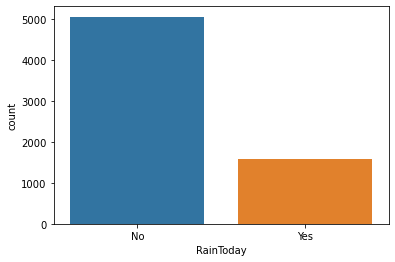

No     5052
Yes    1572
Name: RainToday, dtype: int64


In [6]:
#plot each class frequency
sns.countplot(x='RainToday',data=data)
plt.show()
print(data['RainToday'].value_counts())

The count of no means precipitation (mm) in the 24 hours to 9am not exceeds 1mm is more.

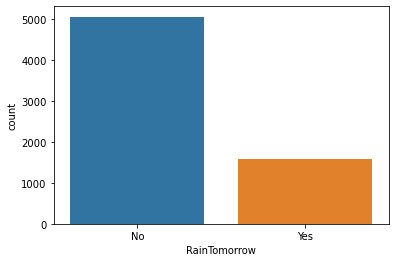

No     5052
Yes    1572
Name: RainTomorrow, dtype: int64


In [7]:
#plot each class frequency
sns.countplot(x='RainTomorrow',data=data)
plt.show()
print(data['RainTomorrow'].value_counts())

As we see the count of RainToday & Rain tommrrow is same

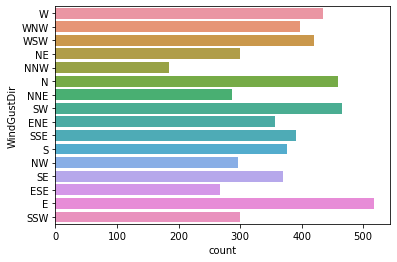

E      518
SW     465
N      459
W      434
WSW    420
WNW    398
SSE    390
S      376
SE     370
ENE    357
NE     300
SSW    299
NW     296
NNE    287
ESE    267
NNW    184
Name: WindGustDir, dtype: int64


In [8]:
#plot each class frequency
sns.countplot(y='WindGustDir',data=data)
plt.show()
print(data['WindGustDir'].value_counts())

The direction of the strongest wind gust in the 24 hours to midnight is coming from the E

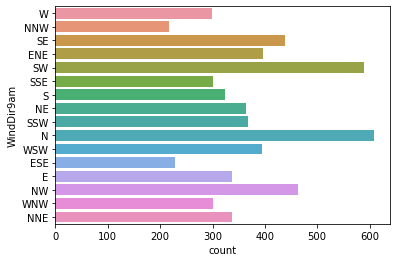

N      609
SW     590
NW     463
SE     439
ENE    397
WSW    394
SSW    368
NE     364
E      338
NNE    337
S      324
WNW    301
SSE    300
W      299
ESE    229
NNW    216
Name: WindDir9am, dtype: int64


In [9]:
#plot each class frequency
sns.countplot(y='WindDir9am',data=data)
plt.show()
print(data['WindDir9am'].value_counts())

From graph we can see that the Direction of the maximum wind at 9am is N & SW

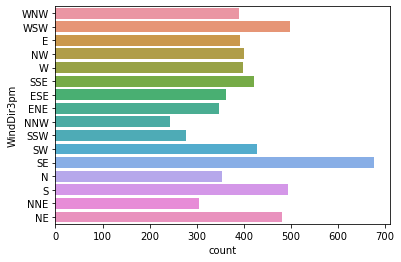

SE     677
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64


In [10]:
#plot each class frequency
sns.countplot(y='WindDir3pm',data=data)
plt.show()
print(data['WindDir3pm'].value_counts())

The maximum Direction of the wind at 3pm from SE.

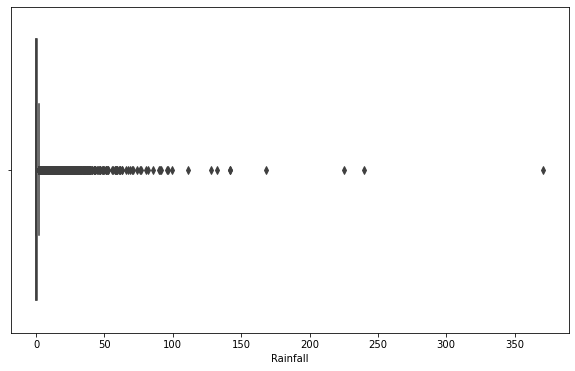

0.0     4334
0.2      321
0.4      144
0.6       87
1.2       69
        ... 
61.2       1
96.8       1
25.2       1
32.8       1
8.7        1
Name: Rainfall, Length: 250, dtype: int64


In [11]:
#plot each class frequency
plt.figure(figsize =(10, 6))
sns.boxplot(x='Rainfall',data=data)
plt.show()
print(data['Rainfall'].value_counts())

The amount of maximum rainfall recorded for the day in mm is 0.0 (43334)

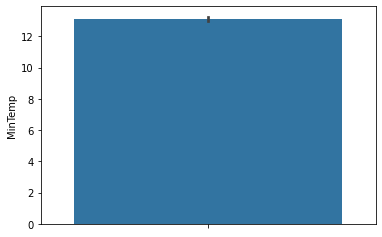

 13.2    58
 12.0    57
 14.8    53
 12.7    53
 10.8    52
         ..
 26.0     1
 25.9     1
-0.8      1
-1.4      1
 28.3     1
Name: MinTemp, Length: 285, dtype: int64


In [12]:
#plot each class frequency
sns.barplot(y='MinTemp',data=data)
plt.show()
print(data['MinTemp'].value_counts())

The count of minimum temperature in degrees celsius is 13.2(58)

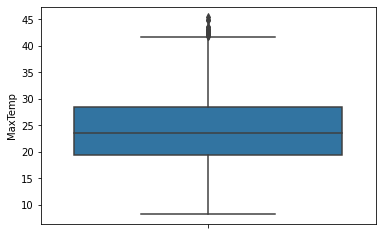

19.0    66
19.8    62
20.8    54
22.3    54
23.8    54
        ..
8.3      1
11.7     1
42.5     1
39.5     1
40.6     1
Name: MaxTemp, Length: 331, dtype: int64


In [13]:
#plot each class frequency
sns.boxplot(y='MaxTemp',data=data)
plt.show()
print(data['MaxTemp'].value_counts())

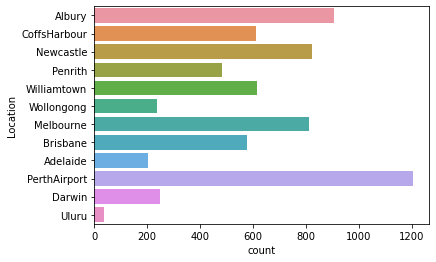

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


In [14]:
#plot each class frequency
sns.countplot(y='Location',data=data)
plt.show()
print(data['Location'].value_counts())

The common name of the location of the  maximum weather station is PerthAirport  (1204)

# Bivariate Plot

<Figure size 720x432 with 0 Axes>

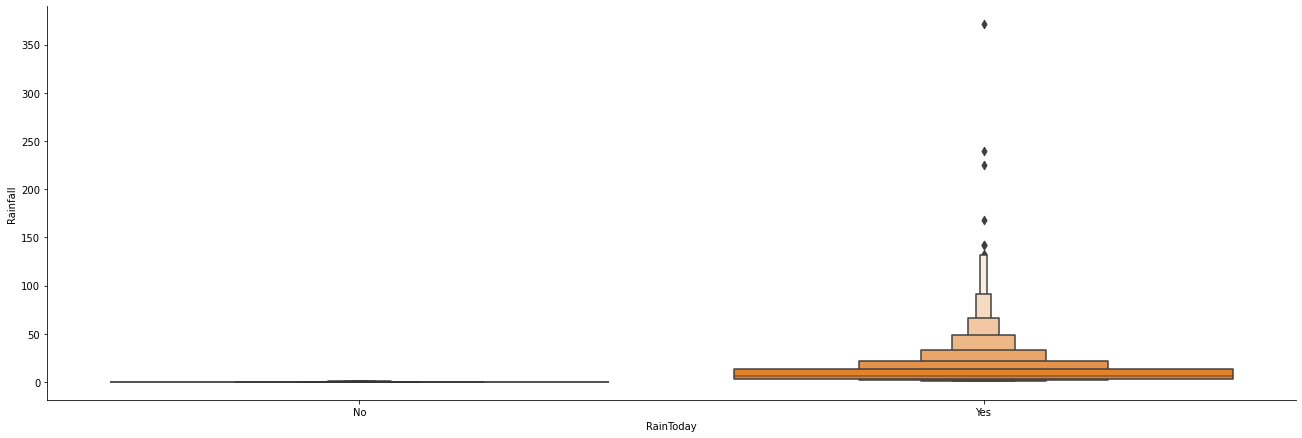

In [15]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='RainToday', y ='Rainfall', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

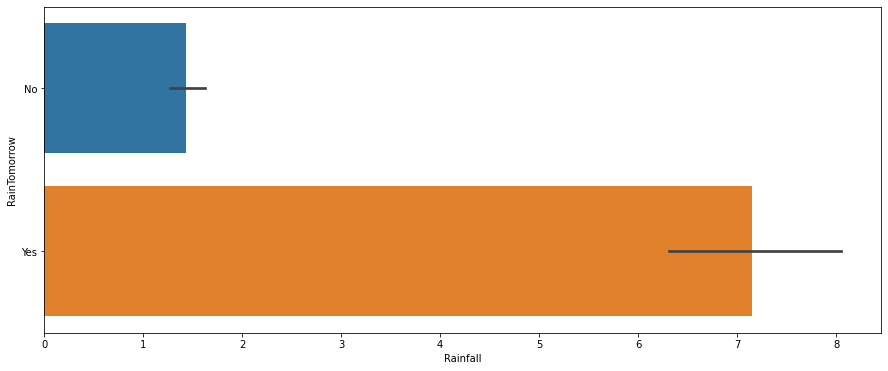

In [16]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='RainTomorrow', x ='Rainfall', data = data)
plt.show()

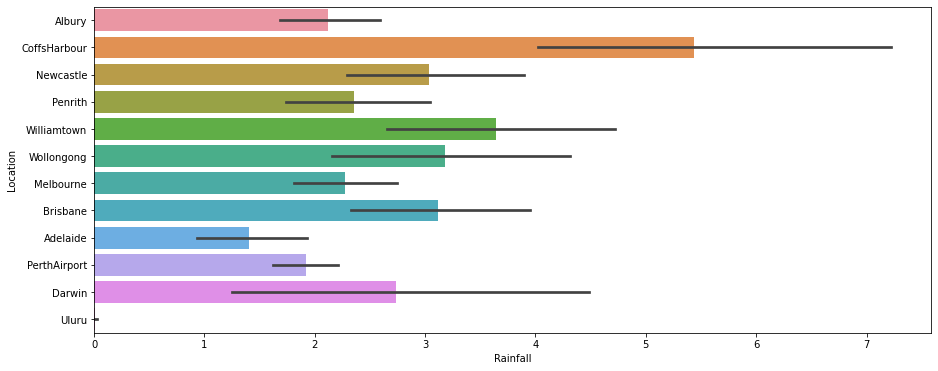

In [17]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Location', x ='Rainfall', data = data)
plt.show()

We can see the maximum rainfall is done in CoffsHarbour station.

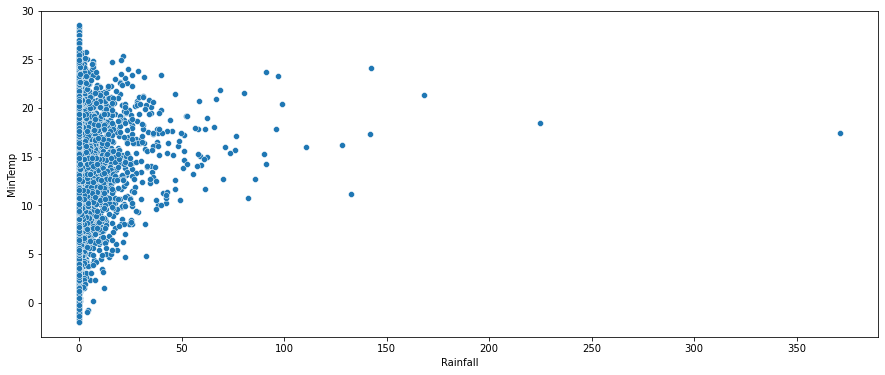

In [18]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.scatterplot(y ='MinTemp', x ='Rainfall', data = data)
plt.show()

As we see the have liniar relationship 

# EDA

From description we can see that Date is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction. For this we require pandas to_datetime to convert object data type to datetime dtype.

In [19]:
# Lets seprate the date column by month & day to visualize the data better
data['Year']=pd.to_datetime(data['Date'])
data['Month']=data['Year'].apply(lambda x:x.month) # Extracting Month
data['Day']=data['Year'].apply(lambda x:x.day)  # Extracting day
data['year']=data['Year'].apply(lambda x:x.year)  # Extracting year

#as we seprated the day month & year we delete date column
data=data.drop(columns=["Date","Year"],axis=1)
data.tail()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,year
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,6,21,2017
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,6,22,2017
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,6,23,2017
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,6,24,2017
8424,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,...,1017.9,8.0,8.0,15.0,20.9,No,NaN,6,25,2017


# Data preprocessing

In [20]:
# replacing null values by mean method
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow'] = data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [21]:
# Lets replace yes and no with categorical value
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [22]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [23]:
# Lets treat the null value of categorical columns by using mode method.
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])

In [24]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
for i in cat_col:
    df=label.fit_transform(data[i])
    pd.Series(df)
    data[i]=df

In [25]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,year
0,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,1007.1,8.0,NaN,16.9,21.8,0,0,12,1,2008
1,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,1007.8,NaN,NaN,17.2,24.3,0,0,12,2,2008
2,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,1008.7,NaN,2.0,21.0,23.2,0,0,12,3,2008
3,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,1012.8,NaN,NaN,18.1,26.5,0,0,12,4,2008
4,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,12,5,2008


As we have other null values also in the data set so lets deal with it by using Imputer tech.

In [26]:
# Creating null value list which we want to impute by using iterative inputer
df=data[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]

Iterative Imputer

Iterative imputer is a hidden gem of the sklearn library in python. The iterative imputer library provides us with tools to tackle the problem mentioned above. Instead of just replacing values with mean/median, we can have a regressor (Linear/Decision Tree/Random Forest/KNN) to impute missing values. By using the iterative imputer we can intelligently impute the missing values, avoid bias, maintain the relationship between variables, and can get better results.

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

for i in df:
    df1=imputer.fit_transform(data[[i]])
    pd.Series([df1])
    data[i]=df1

In [28]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,year
0,1,13.4,22.9,0.6,5.302395,7.890896,13,44.0,13,14,...,1007.1,8.000000,4.320988,16.9,21.8,0,0,12,1,2008
1,1,7.4,25.1,0.0,5.302395,7.890896,14,44.0,6,15,...,1007.8,4.336806,4.320988,17.2,24.3,0,0,12,2,2008
2,1,12.9,25.7,0.0,5.302395,7.890896,15,46.0,13,15,...,1008.7,4.336806,2.000000,21.0,23.2,0,0,12,3,2008
3,1,9.2,28.0,0.0,5.302395,7.890896,4,24.0,9,0,...,1012.8,4.336806,4.320988,18.1,26.5,0,0,12,4,2008
4,1,17.5,32.3,1.0,5.302395,7.890896,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,12,5,2008


In [29]:
print(data.isna().sum()) # check again for the null values

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Day              0
year             0
dtype: int64


In [30]:
# See again Statistical Summary
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,year
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,...,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,5.323721,13.109145,24.098345,2.780148,5.302395,7.890896,6.610470,38.977663,7.013310,7.842798,...,1015.119923,4.336806,4.320988,17.895038,22.708561,0.232476,0.232476,6.462141,15.737208,2012.052203
std,3.099455,5.540667,6.130123,10.482769,3.343713,2.733639,5.233746,13.376457,4.550702,4.486894,...,5.967638,2.474649,2.323276,5.722411,5.971845,0.422442,0.422442,3.377471,8.793898,2.301057
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,2.250000,9.000000,19.600000,0.000000,4.000000,7.890896,1.000000,30.000000,3.000000,4.000000,...,1011.500000,2.000000,3.000000,13.900000,18.400000,0.000000,0.000000,4.000000,8.000000,2010.000000
50%,6.000000,13.109145,23.500000,0.000000,5.302395,7.890896,7.000000,38.977663,7.000000,9.000000,...,1015.119923,4.336806,4.320988,17.900000,22.300000,0.000000,0.000000,6.000000,16.000000,2012.000000
75%,8.000000,17.400000,28.400000,1.200000,5.302395,9.200000,12.000000,46.000000,11.000000,12.000000,...,1018.400000,7.000000,6.000000,22.200000,26.800000,0.000000,0.000000,9.000000,23.000000,2014.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,12.000000,31.000000,2017.000000


All null values are treated well now lets move further for the skewness & colinarity

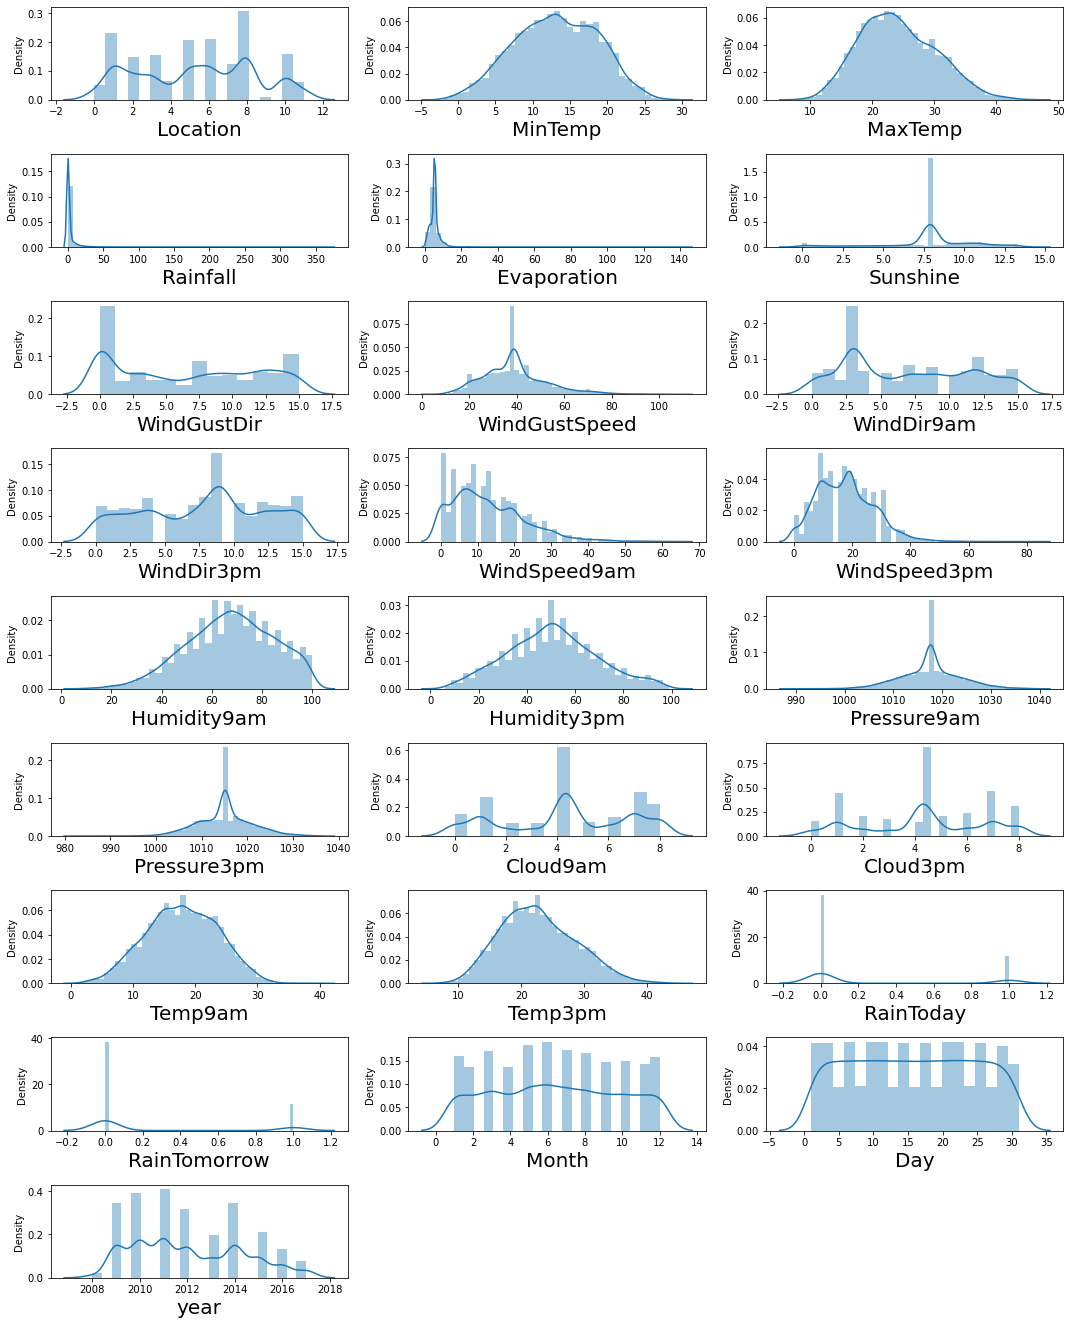

In [31]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [32]:
data.skew()

Location         -0.000009
MinTemp          -0.083706
MaxTemp           0.327598
Rainfall         13.650294
Evaporation      13.553368
Sunshine         -0.882147
WindGustDir       0.105287
WindGustSpeed     0.780437
WindDir9am        0.220355
WindDir3pm       -0.123726
WindSpeed9am      0.957036
WindSpeed3pm      0.549797
Humidity9am      -0.256177
Humidity3pm       0.150860
Pressure9am       0.022085
Pressure3pm       0.042990
Cloud9am         -0.215085
Cloud3pm         -0.162159
Temp9am          -0.047213
Temp3pm           0.348100
RainToday         1.266937
RainTomorrow      1.266937
Month             0.021988
Day               0.006240
year              0.354481
dtype: float64

As we see the skewed data is present as per thumb rule +0.5/-0.5 weight lets work on right skewed data by using power transform

In [33]:
# Separate the skewed columns
df1=['Rainfall','Evaporation','Sunshine','WindSpeed9am','RainToday']

# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data[df1]=pt.fit_transform(data[df1].values)

In [34]:
data[df1]

,Rainfall,Evaporation,Sunshine,WindSpeed9am,RainToday
0,0.592756,0.17104,-0.099351,0.826343,-0.550355
1,-0.681888,0.17104,-0.099351,-0.868318,-0.550355
2,-0.681888,0.17104,-0.099351,0.748912,-0.550355
3,-0.681888,0.17104,-0.099351,0.032879,-0.550355
4,0.950465,0.17104,-0.099351,-0.428868,-0.550355
...,...,...,...,...,...
8420,-0.681888,0.17104,-0.099351,0.231834,-0.550355
8421,-0.681888,0.17104,-0.099351,0.231834,-0.550355
8422,-0.681888,0.17104,-0.099351,-0.185237,-0.550355
8423,-0.681888,0.17104,-0.099351,0.231834,-0.550355


In [35]:
data.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,year
0,1,13.4,22.9,0.592756,0.17104,-0.099351,13,44.0,13,14,...,1007.1,8.000000,4.320988,16.9,21.8,-0.550355,0,12,1,2008
1,1,7.4,25.1,-0.681888,0.17104,-0.099351,14,44.0,6,15,...,1007.8,4.336806,4.320988,17.2,24.3,-0.550355,0,12,2,2008
2,1,12.9,25.7,-0.681888,0.17104,-0.099351,15,46.0,13,15,...,1008.7,4.336806,2.000000,21.0,23.2,-0.550355,0,12,3,2008


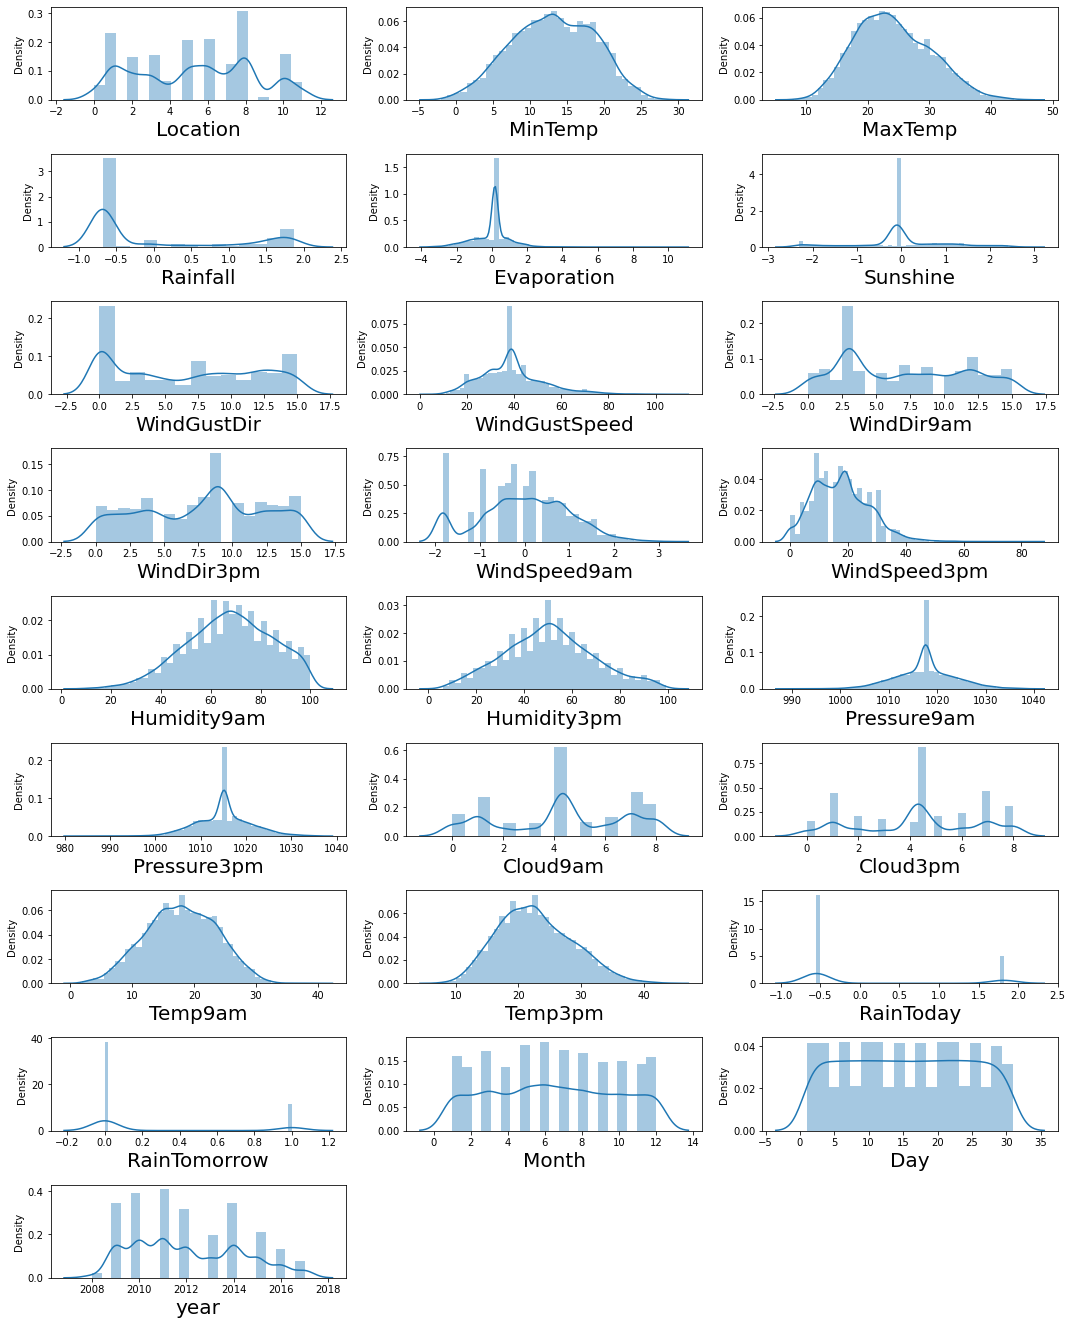

In [36]:
# Distribution or Graphical analysis after Power transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Now we handaled skewed data lets check the outliers between label and predictors

In [37]:
data.shape

(6762, 25)

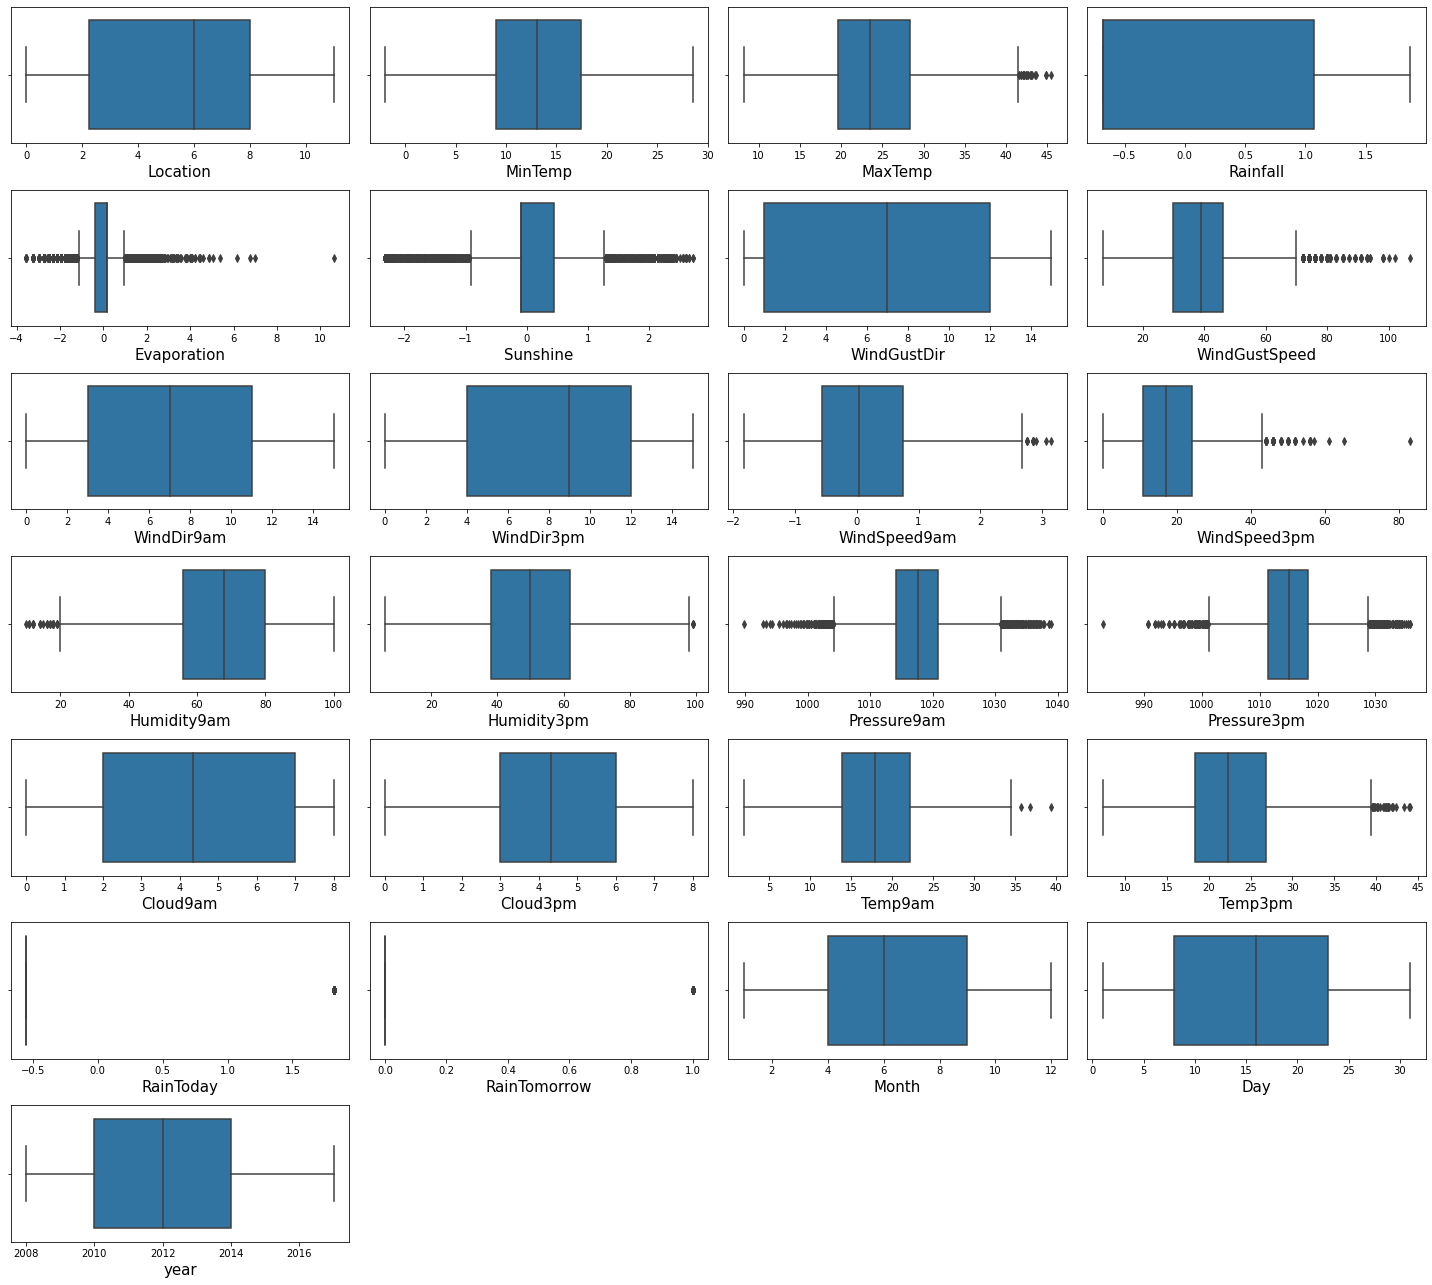

In [38]:
#Let's see the outliers in the dataset by using box plot or Graphical analysis of all features
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From graph we can see the outliers are present in the 'MaxTemp','Evaporation', 'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm', columns so lets deal with it by using Zscore

In [39]:
# from above graph we see there is outliers in featurs Let's remove outliers from above columns by using Zscore
z_score=zscore(data[['MaxTemp','Evaporation', 'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

In [40]:
# Data after removing outliers
data.shape

(6528, 25)

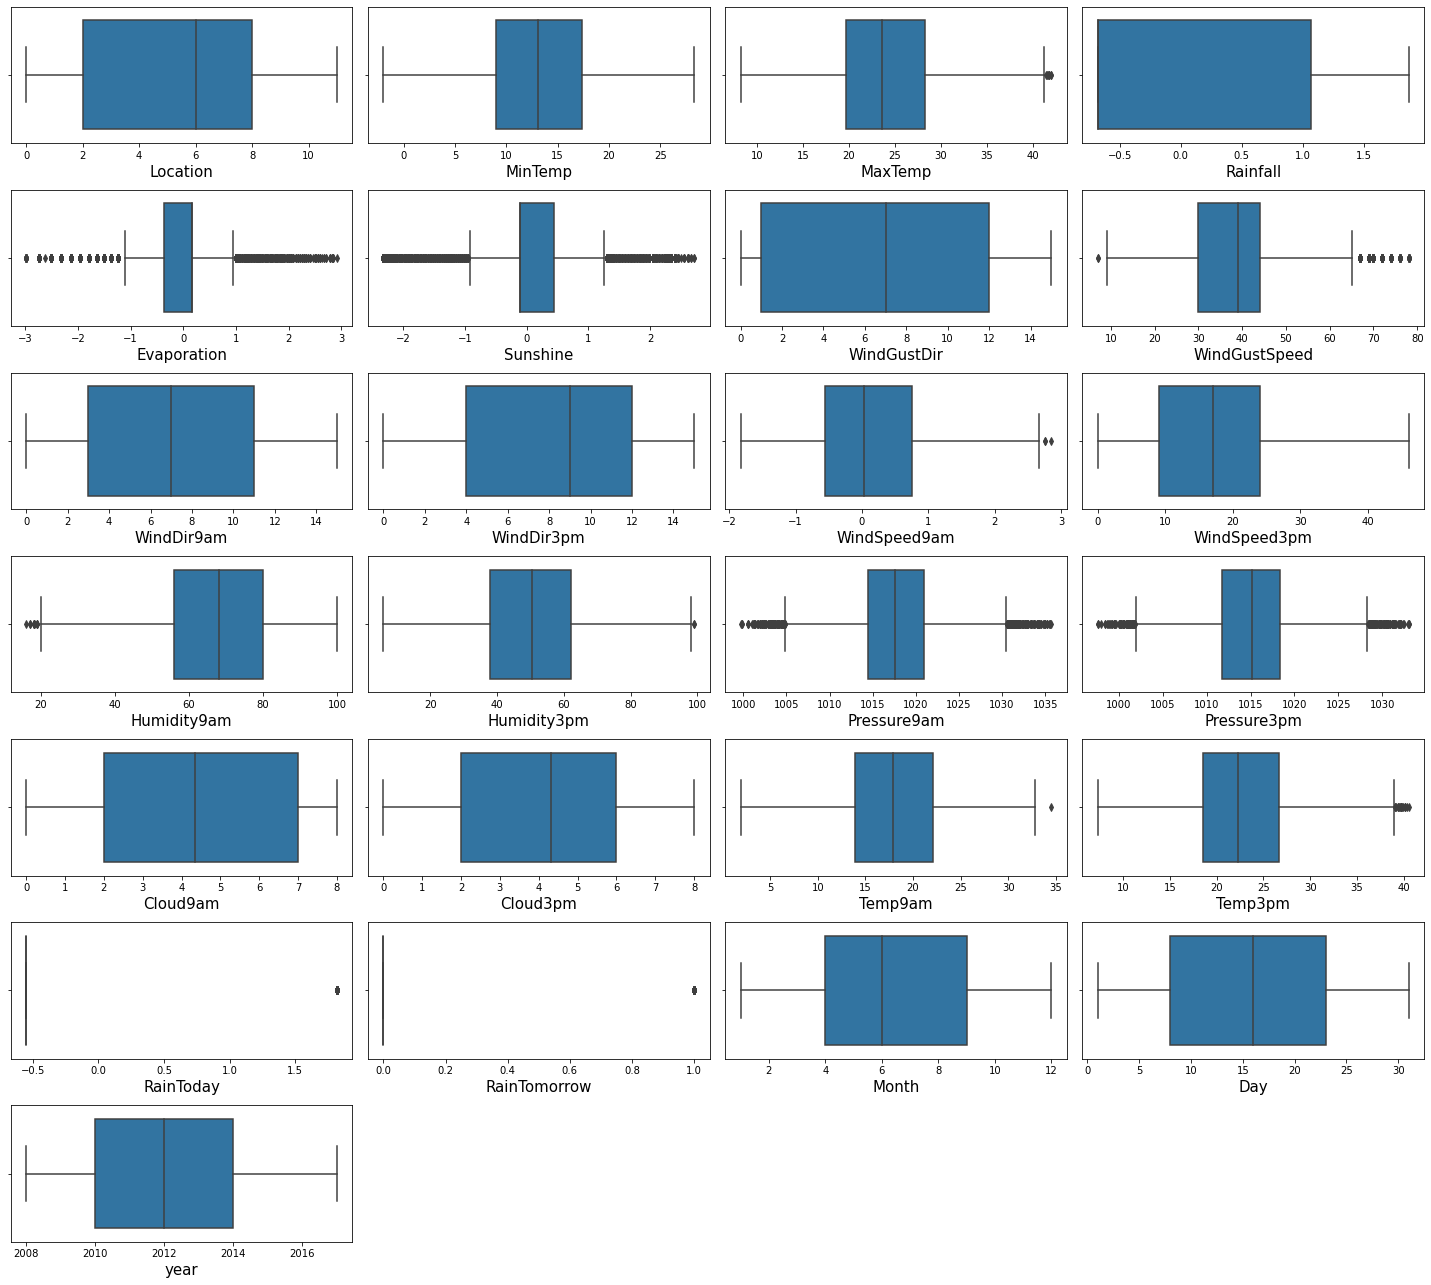

In [41]:
#Let's see plot after removing outliers
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Now we handaled outliers data lets check the colinarity between label and predictors

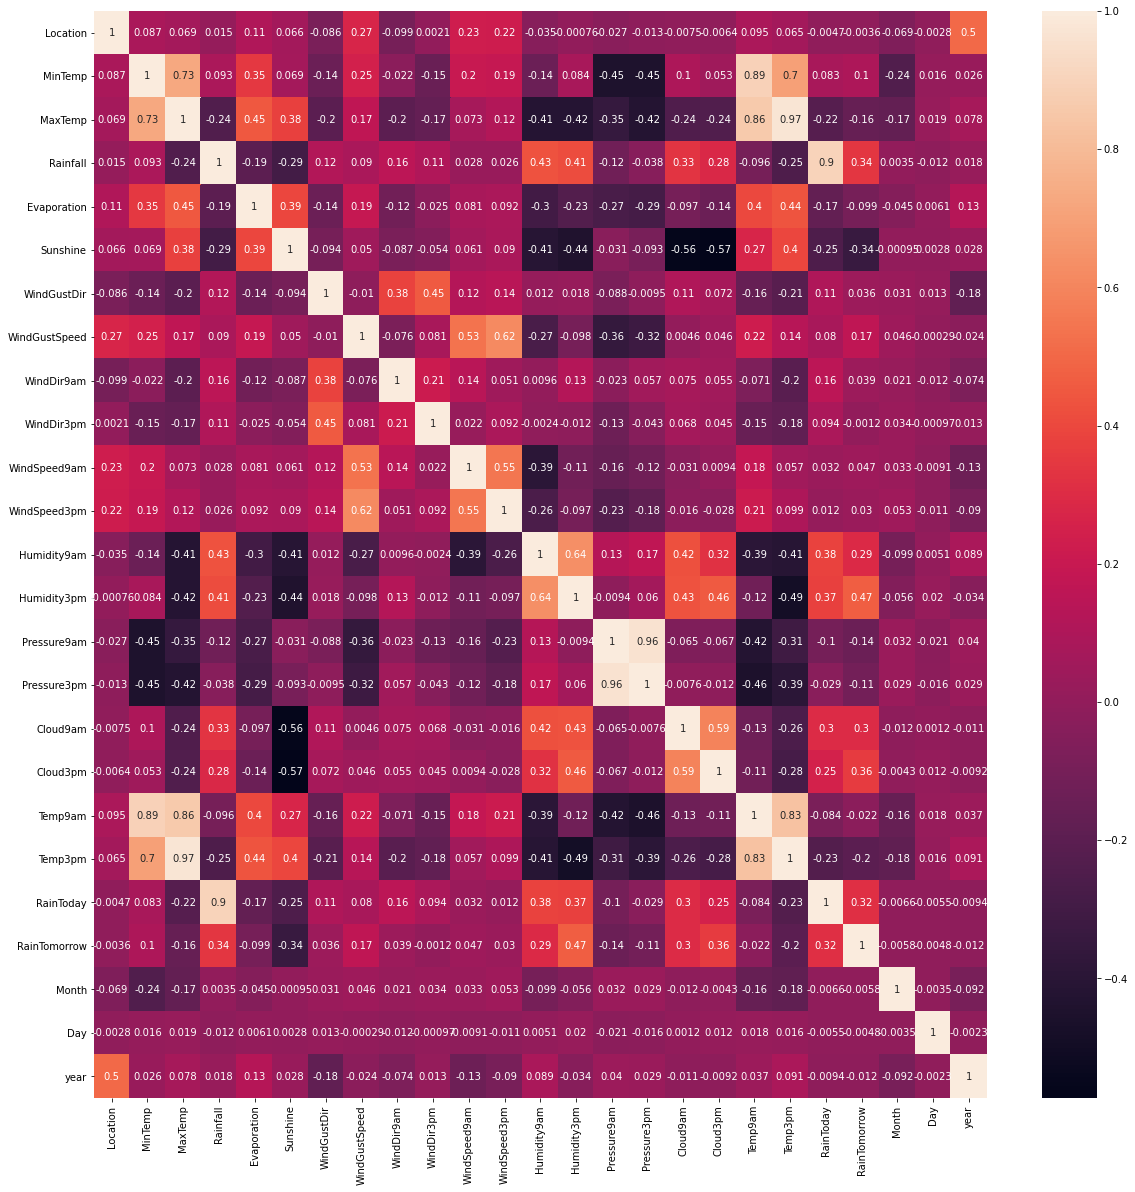

In [42]:
#check multicolinearity
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

From above correlation heatmap we see there are colinarity between predictors lest check by VIF

In [43]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['RainTomorrow'])
y=data['RainTomorrow']

In [44]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [45]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

          vif        featurs
0    1.641414       Location
1    9.239143        MinTemp
2   26.178363        MaxTemp
3    5.806914       Rainfall
4    1.573782    Evaporation
5    2.125874       Sunshine
6    1.575972    WindGustDir
7    2.213317  WindGustSpeed
8    1.350336     WindDir9am
9    1.419221     WindDir3pm
10   2.031109   WindSpeed9am
11   1.965078   WindSpeed3pm
12   4.179515    Humidity9am
13   5.519474    Humidity3pm
14  20.169785    Pressure9am
15  19.336851    Pressure3pm
16   2.034640       Cloud9am
17   1.932049       Cloud3pm
18  17.882650        Temp9am
19  32.361983        Temp3pm
20   5.272652      RainToday
21   1.148846          Month
22   1.004415            Day
23   1.587009           year


In [46]:
# Lets make thumb rule we can drop the columns if VIF values are more than the 10 pvalue
index=np.where(vif['vif']>10)
vif.loc[index]

,vif,featurs
2,26.178363,MaxTemp
14,20.169785,Pressure9am
15,19.336851,Pressure3pm
18,17.882650,Temp9am
19,32.361983,Temp3pm


As we see the pvalues of above predictors is more than 10 so lets drop the same & reduce the colinarity.

In [47]:
# Let's Seperate the data again 
x=data.drop(columns=['RainTomorrow','MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm'])
y=data['RainTomorrow']

In [48]:
print(x.shape)
print(y.shape)

(6528, 19)
(6528,)


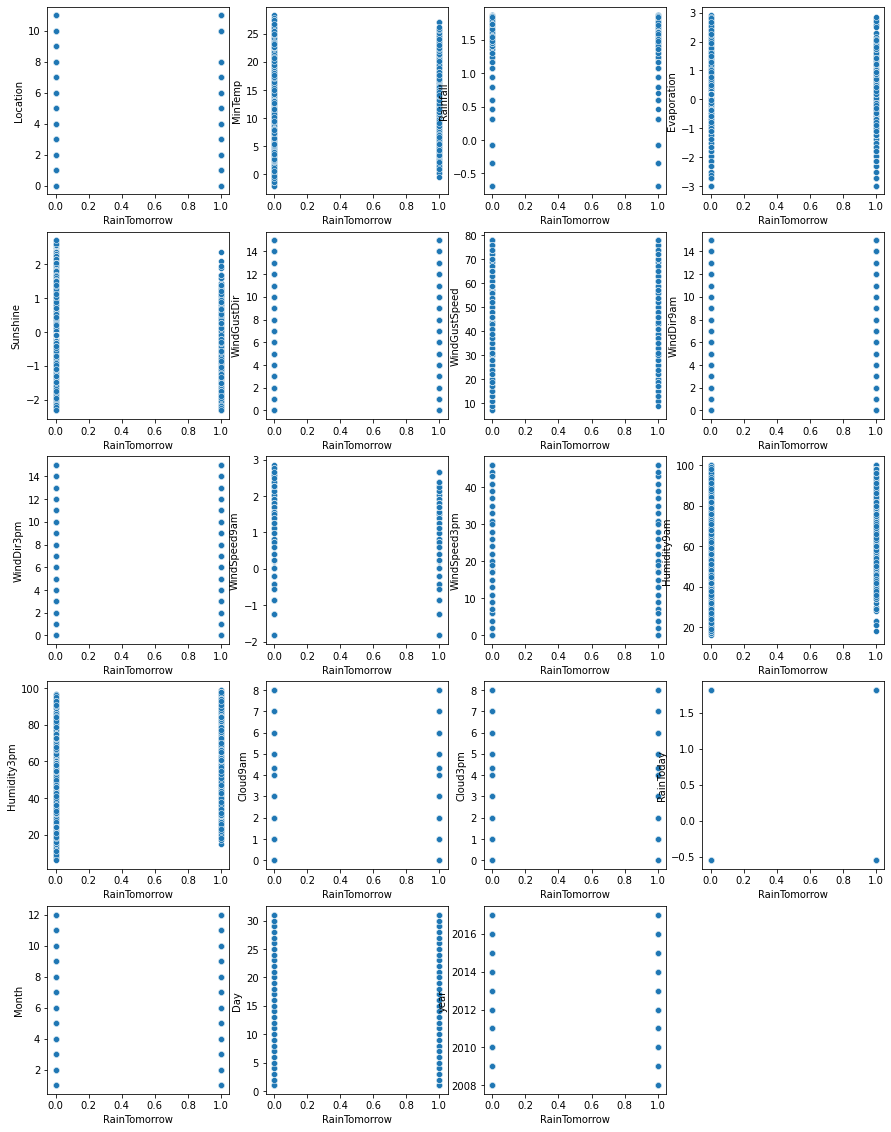

In [49]:
# see how featurs r related to lable(Graphical Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.scatterplot(y,x[column])
    plotnumber+=1
plt.show()

# Data Regularization

In [50]:
print(data['RainTomorrow'].value_counts()) # data is imbalanced lets use SMOTE

0    5035
1    1493
Name: RainTomorrow, dtype: int64


In [51]:
# Lets select the proper random state to build best model by using LogisticRegression

from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_train)
    pred=LR.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {accuracy_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {accuracy_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.8349748303786386
at random sate 0, the testing accuracy is:- 0.8443083205717202


at random sate 1, the training accuracy is:- 0.8406653534690304
at random sate 1, the testing accuracy is:- 0.8274629913221031


at random sate 2, the training accuracy is:- 0.8400087546509083
at random sate 2, the testing accuracy is:- 0.8381827462991323


at random sate 3, the training accuracy is:- 0.8358502954694682
at random sate 3, the testing accuracy is:- 0.84788157223073


at random sate 4, the training accuracy is:- 0.8417596848325674
at random sate 4, the testing accuracy is:- 0.8320571720265442


at random sate 5, the training accuracy is:- 0.8384766907419566
at random sate 5, the testing accuracy is:- 0.8443083205717202


at random sate 6, the training accuracy is:- 0.8358502954694682
at random sate 6, the testing accuracy is:- 0.8458397141398672


at random sate 7, the training accuracy is:- 0.8382578244692492
at random sate 7, the testing accur

at random sate 67, the testing accuracy is:- 0.8402246043899949


at random sate 68, the training accuracy is:- 0.8417596848325674
at random sate 68, the testing accuracy is:- 0.8335885655946912


at random sate 69, the training accuracy is:- 0.8424162836506894
at random sate 69, the testing accuracy is:- 0.8300153139356815


at random sate 70, the training accuracy is:- 0.8358502954694682
at random sate 70, the testing accuracy is:- 0.846350178662583


at random sate 71, the training accuracy is:- 0.8336616327423944
at random sate 71, the testing accuracy is:- 0.8468606431852986


at random sate 72, the training accuracy is:- 0.8325673013788575
at random sate 72, the testing accuracy is:- 0.8545176110260337


at random sate 73, the training accuracy is:- 0.8378200919238346
at random sate 73, the testing accuracy is:- 0.8402246043899949


at random sate 74, the training accuracy is:- 0.8459181440140074
at random sate 74, the testing accuracy is:- 0.8295048494129658


at random sate 75,

at 9, random state the score is almost similar so i am selecting the 9 random state to build the best models

In [52]:
#Lets Split data  again into train & test by using this random state
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=9)

In [53]:
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(0.80)
x_train_ns,y_train_ns=ove_smp.fit_sample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 3513, 1: 1056})
Counter({0: 3513, 1: 2810})


# Lets build the model to predict the RainTomarrow

In [54]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",accuracy_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [55]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [56]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.7839633085560651
Test Report: 0.8131699846860643
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.85      0.88      1522
           1       0.57      0.68      0.62       437

    accuracy                           0.81      1959
   macro avg       0.74      0.77      0.75      1959
weighted avg       0.83      0.81      0.82      1959

Confusion Matrix: [[1294  228]
 [ 138  299]]
Accuracy: 78.16 %
Standard Deviation: 0.58 %


In [57]:
# Model no.2
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train_ns,y_train_ns)

print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(svc)


Train Report: 0.8832832516210659
Test Report: 0.8203164880040837
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.87      0.88      1522
           1       0.59      0.65      0.62       437

    accuracy                           0.82      1959
   macro avg       0.74      0.76      0.75      1959
weighted avg       0.83      0.82      0.82      1959

Confusion Matrix: [[1324  198]
 [ 154  283]]
Accuracy: 83.25 %
Standard Deviation: 0.46 %


In [58]:
#Model no.3
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.7636549259826442
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1522
           1       0.48      0.58      0.52       437

    accuracy                           0.76      1959
   macro avg       0.67      0.70      0.68      1959
weighted avg       0.78      0.76      0.77      1959

Confusion Matrix: [[1241  281]
 [ 182  255]]
Accuracy: 78.22 %
Standard Deviation: 1.66 %


In [59]:
#Model no.4
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()

ada.fit(x_train_ns,y_train_ns)

print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(ada)

Train Report: 0.8266645579629922
Test Report: 0.8172537008677897
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1522
           1       0.58      0.64      0.61       437

    accuracy                           0.82      1959
   macro avg       0.74      0.75      0.74      1959
weighted avg       0.82      0.82      0.82      1959

Confusion Matrix: [[1322  200]
 [ 158  279]]
Accuracy: 79.11 %
Standard Deviation: 2.83 %


In [60]:
# Model no.5
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 1.0
Test Report: 0.8453292496171516
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1522
           1       0.68      0.59      0.63       437

    accuracy                           0.85      1959
   macro avg       0.78      0.75      0.77      1959
weighted avg       0.84      0.85      0.84      1959

Confusion Matrix: [[1400  122]
 [ 181  256]]
Accuracy: 86.57 %
Standard Deviation: 2.42 %


In [61]:
#Model no.9
import xgboost as xgb

xgb=xgb.XGBClassifier()

xgb.fit(x_train_ns,y_train_ns)

print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9981021666930254
Test Report: 0.844818785094436
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1522
           1       0.70      0.54      0.61       437

    accuracy                           0.84      1959
   macro avg       0.79      0.74      0.76      1959
weighted avg       0.84      0.84      0.84      1959

Confusion Matrix: [[1418  104]
 [ 200  237]]
Accuracy: 82.90 %
Standard Deviation: 6.91 %


# lets check ROC AUC curve for fitted model

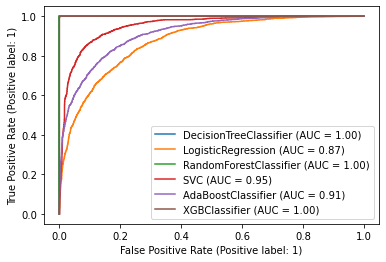

In [62]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(LR,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(svc,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(ada,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(xgb,x_train_ns,y_train_ns,ax=disp.ax_)

# Lets check how our model works on test data

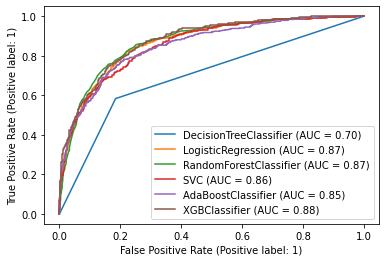

In [63]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)

Looking at the accuracy and ROC curve i m selecting Logistic Regression & XGBClassifier lets get better accuracy by hyper tuning parameter

In [64]:
# Hyper tuning by using RandomizedSearchCV With XGB
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':[7,10,8],'gamma':[0.25,0.1,0.3,0.4],'max_depth':[2,4,6,7,8,9],'random_state':[20,10,30]}
rand=RandomizedSearchCV(estimator=xgb, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 30, 'n_estimators': 10, 'max_depth': 6, 'gamma': 0.25}

In [83]:
#Model no.6
import xgboost as xgb

xgb=xgb.XGBClassifier(random_state= 30, n_estimators= 10, max_depth= 6, gamma= 0.09)

xgb.fit(x_train_ns,y_train_ns)

print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.8956191681164004
Test Report: 0.8453292496171516
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1522
           1       0.66      0.63      0.64       437

    accuracy                           0.85      1959
   macro avg       0.78      0.77      0.77      1959
weighted avg       0.84      0.85      0.84      1959

Confusion Matrix: [[1382  140]
 [ 163  274]]
Accuracy: 82.43 %
Standard Deviation: 2.26 %


In [84]:
# Hyper tuning by using RandomizedSearchCV With  LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

para={'C':[0.25,0.1,0.3,0.4],'random_state':range(0,100,2)}
rand=RandomizedSearchCV(estimator=LR, cv=2,param_distributions=para)
rand.fit(x_train_ns,y_train_ns)

rand.best_params_

{'random_state': 10, 'C': 0.3}

In [85]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression(random_state= 10, C= 0.3)
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.7839633085560651
Test Report: 0.8141909137314957
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.85      0.88      1522
           1       0.57      0.68      0.62       437

    accuracy                           0.81      1959
   macro avg       0.74      0.77      0.75      1959
weighted avg       0.83      0.81      0.82      1959

Confusion Matrix: [[1297  225]
 [ 139  298]]
Accuracy: 78.24 %
Standard Deviation: 0.63 %


In [88]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':[7,10,8],'ccp_alpha':[0.25,0.1,0.3,0.4],'max_depth':[2,4,6,7,8,9],'random_state':[20,10,30]}
rand=RandomizedSearchCV(estimator=rand_clf, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 10, 'n_estimators': 8, 'max_depth': 8, 'ccp_alpha': 0.1}

In [89]:
# Model no.5
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier(random_state =10, n_estimators= 8, max_depth= 8, ccp_alpha= 0.1)
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 0.5555907006167958
Test Report: 0.7769270035732516
Classification Report:               precision    recall  f1-score   support

           0       0.78      1.00      0.87      1522
           1       0.00      0.00      0.00       437

    accuracy                           0.78      1959
   macro avg       0.39      0.50      0.44      1959
weighted avg       0.60      0.78      0.68      1959

Confusion Matrix: [[1522    0]
 [ 437    0]]
Accuracy: 55.56 %
Standard Deviation: 0.01 %


# Lets Check Curve again after hyper tune parameter RandomizedSearchCV on tarin data

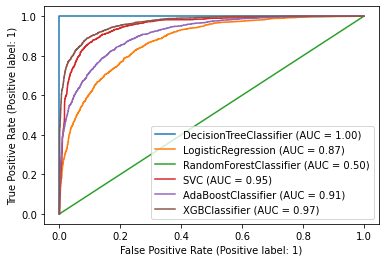

In [90]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(LR,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(svc,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(ada,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(xgb,x_train_ns,y_train_ns,ax=disp.ax_)

# Lets Check Curve again after hyper tune parameter RandomizedSearchCV on test data

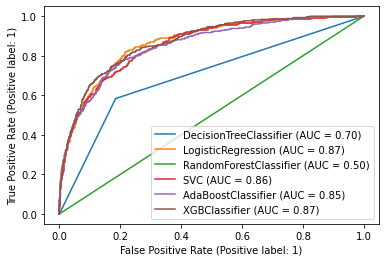

In [91]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)

# Looking at accuracy, ROC AUC Curve & confusion matrix i m selecting XGBClassifier without Hyper tuning by using RandomizedSearchCV with Kfold cross validation method

In [92]:
#save model
import pickle
Filename='Finalized_model_RainTomarrow.pickle'
pickle.dump(xgb,open(Filename,'wb'))

# Lets build the model for Rainfall prediction 

In [94]:
data.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,year
0,1,13.4,22.9,0.592756,0.17104,-0.099351,13,44.0,13,14,...,1007.1,8.000000,4.320988,16.9,21.8,-0.550355,0,12,1,2008
1,1,7.4,25.1,-0.681888,0.17104,-0.099351,14,44.0,6,15,...,1007.8,4.336806,4.320988,17.2,24.3,-0.550355,0,12,2,2008


In [95]:
# Let's Seperate the data again 
x=data.drop(columns=['Rainfall','MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm'])
y=data['Rainfall']

In [96]:
print(x.shape)
print(y.shape)

(6528, 19)
(6528,)


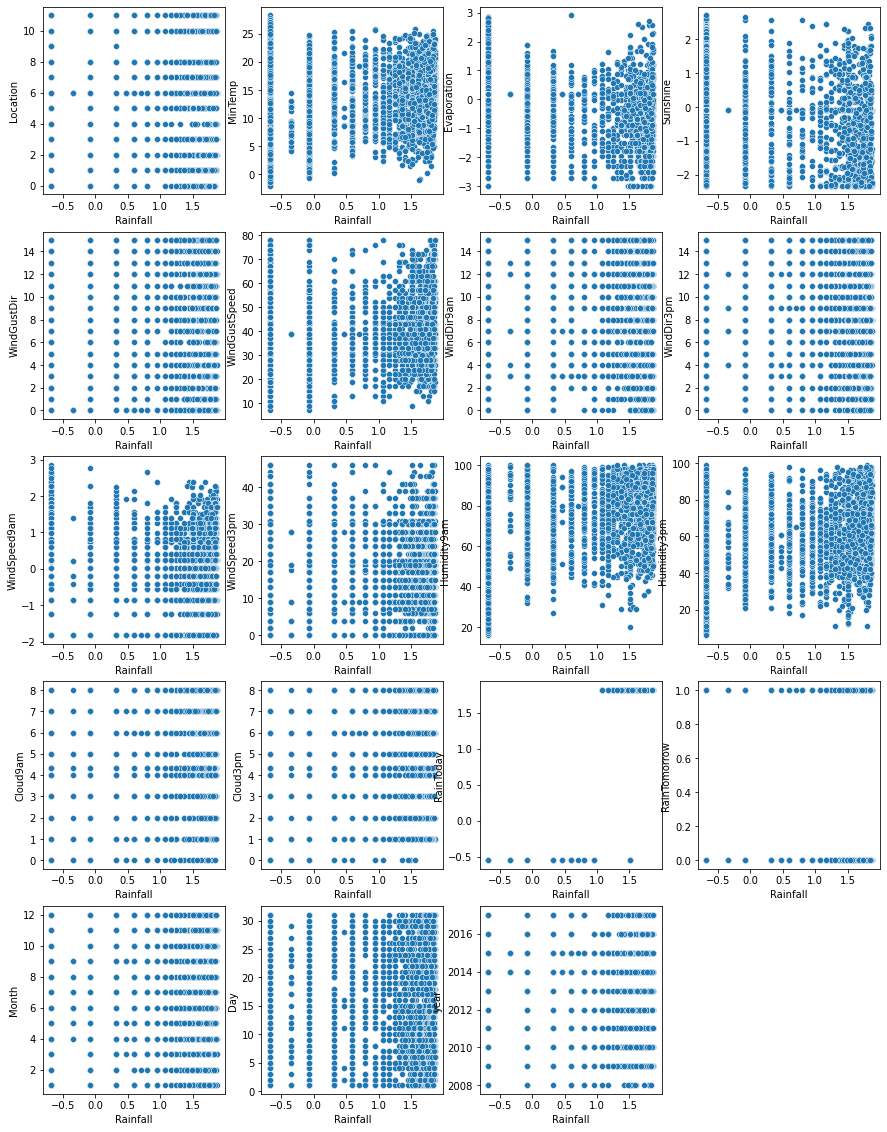

In [97]:
# see how featurs r related to lable(Graphical Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.scatterplot(y,x[column])
    plotnumber+=1
plt.show()

In [99]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [101]:
# Lets select the proper random state to build best model by using LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {r2_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {r2_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.8132851111315628
at random sate 0, the testing accuracy is:- 0.852170937192545


at random sate 1, the training accuracy is:- 0.831215627965969
at random sate 1, the testing accuracy is:- 0.8107134512622816


at random sate 2, the training accuracy is:- 0.8155390687852084
at random sate 2, the testing accuracy is:- 0.8481357835689861


at random sate 3, the training accuracy is:- 0.8202902154493735
at random sate 3, the testing accuracy is:- 0.8372058677360811


at random sate 4, the training accuracy is:- 0.8230606873425226
at random sate 4, the testing accuracy is:- 0.8308884757363004


at random sate 5, the training accuracy is:- 0.8322504712616859
at random sate 5, the testing accuracy is:- 0.8089248197187067


at random sate 6, the training accuracy is:- 0.8221599187571982
at random sate 6, the testing accuracy is:- 0.8325136994700024


at random sate 7, the training accuracy is:- 0.8181130420581516
at random sate 7, the testing accur

at random sate 89, the testing accuracy is:- 0.8242963348259658


at random sate 90, the training accuracy is:- 0.823692326856702
at random sate 90, the testing accuracy is:- 0.8297283873576465


at random sate 91, the training accuracy is:- 0.8280900944524596
at random sate 91, the testing accuracy is:- 0.8189937365110239


at random sate 92, the training accuracy is:- 0.8346394316545365
at random sate 92, the testing accuracy is:- 0.8022282494007406


at random sate 93, the training accuracy is:- 0.8178731043531106
at random sate 93, the testing accuracy is:- 0.8428578058809197


at random sate 94, the training accuracy is:- 0.8272633121282965
at random sate 94, the testing accuracy is:- 0.8211786142944514


at random sate 95, the training accuracy is:- 0.8335145284205784
at random sate 95, the testing accuracy is:- 0.8067710117935396


at random sate 96, the training accuracy is:- 0.817214332641406
at random sate 96, the testing accuracy is:- 0.8432848158458983


at random sate 97, 

In [102]:
#Lets Split data  again into train & test by using this random state
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=41)

# Lets Build Model

In [103]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))

In [104]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [105]:
# Model no.1
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)
model_accuracy(lr)

Train Report: 0.8250353872843097
Test Report: 0.8260898794778679
RMSE: 0.4180357990255524
MAE: 0.2643185585850299
MSE: 0.17475392926693203
Accuracy: 82.29 %
Standard Deviation: 1.72 %


In [106]:
# Model no.2
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
rand_regressor.fit(x_train,y_train)

print_score(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_regressor)

Train Report: 0.97789183465033
Test Report: 0.8429117557879177
RMSE: 0.39730395608234503
MAE: 0.25548502403313555
MSE: 0.15785043351868197
Accuracy: 83.90 %
Standard Deviation: 1.47 %


In [107]:
# Model no.3
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9848652198417125
Test Report: 0.8420585336715332
RMSE: 0.39838146976644384
MAE: 0.2564796045990425
MSE: 0.158707795453272
Accuracy: 83.06 %
Standard Deviation: 1.31 %


In [108]:
#Model no.4
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor()

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.8656805111018595
Test Report: 0.8476774446738157
RMSE: 0.39123090572819386
MAE: 0.24846540994397093
MSE: 0.15306162159690292
Accuracy: 84.08 %
Standard Deviation: 1.82 %


In [109]:
#Model no.5
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test,train=True)
print_score(dt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.6936168159409823
RMSE: 0.5548601172377078
MAE: 0.2738198014101206
MSE: 0.30786974970104286
Accuracy: 66.09 %
Standard Deviation: 2.56 %


In [110]:
#Model no.6
from sklearn.ensemble import BaggingRegressor

bb=BaggingRegressor()

bb.fit(x_train,y_train)

print_score(bb,x_train,x_test,y_train,y_test,train=True)
print_score(bb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9673125228300814
Test Report: 0.8273712098864832
RMSE: 0.4164929553623401
MAE: 0.25618447076054957
MSE: 0.17346638186645622
Accuracy: 81.98 %
Standard Deviation: 1.25 %


# Looking at train and test report & cross validation score i m selecting BaggingRegressor